In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
def display_img(img,cmap='gray'):
    fig=plt.figure(figsize=(10,12))
    ax=plt.subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
reeses=cv2.imread("../DATA/reeses_puffs.png",0)

In [6]:
cereals=cv2.imread("../DATA/many_cereals.jpg",0)

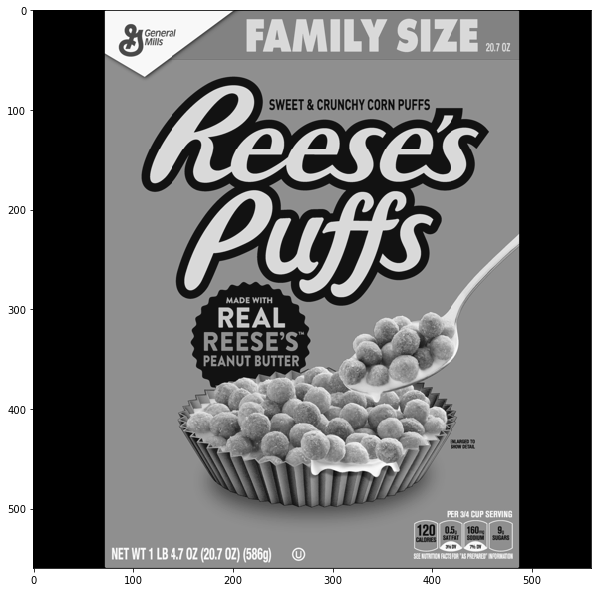

In [10]:
display_img(reeses)

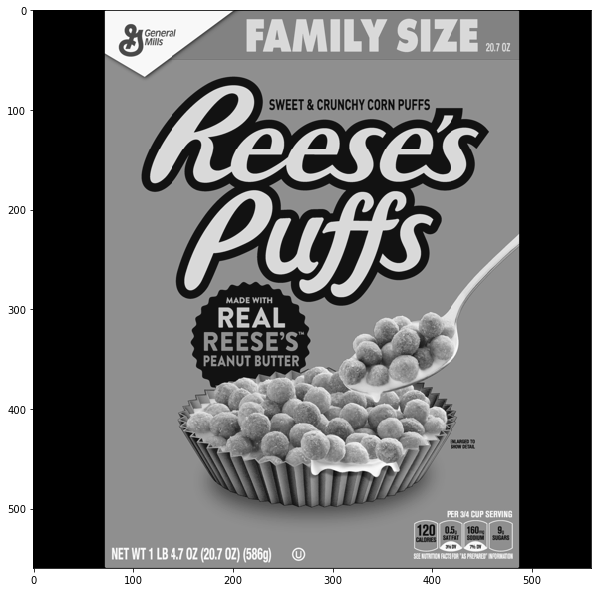

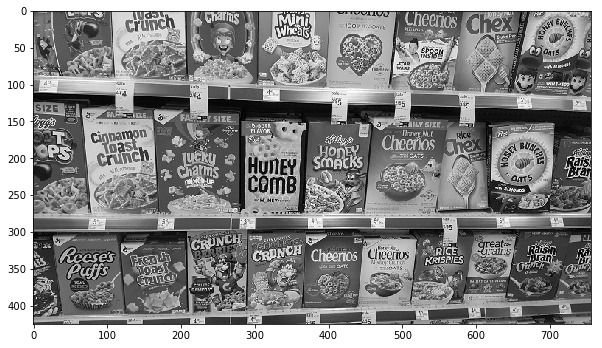

In [11]:
display_img(cereals)

In [12]:
#starting with feature matching

In [13]:
# 1] Initating orb

In [14]:
orb=cv2.ORB_create()

In [16]:
# 2] find descriptors and keypoints , getting features of the image using orb

In [17]:
kp1,des1=orb.detectAndCompute(reeses,None)

In [18]:
kp2,des2=orb.detectAndCompute(cereals,None)

In [19]:
#We got out features not its time to match the features between.

In [23]:
# 3] Initate Brute Force matcher

In [24]:
matcher=cv2.BFMatcher_create()

In [25]:
# 4] Using the Brute force matcher instance, match the descriptors between the two photos

In [30]:
matches=matcher.match(des1,des2)

In [31]:
                #Matches 

In [29]:
len(matches) # 500 mathches are returned 

500

In [32]:
matches[:1]

[<DMatch 000001B5904397F0>]

In [33]:
singleMatch=matches[0]

In [35]:
singleMatch.distance # every element of returned matches have few properties, one of them is distance. lesser the distance -> better the match, larger the distance -> poorer the match

414.6142883300781

In [36]:
# 5] sorting best matches according to the distance property

In [37]:
matches=sorted(matches,key=lambda x:x.distance)

In [38]:
matches[0].distance

236.4952392578125

In [39]:
# 6] drawing the matches 

In [43]:
result=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:10],None,flags=2)

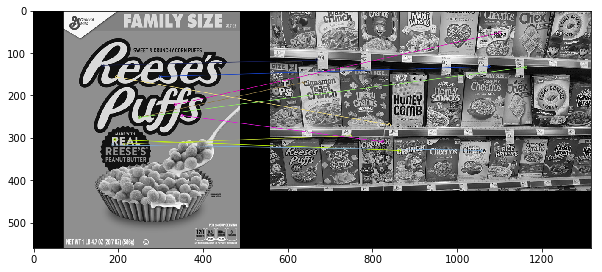

In [44]:
display_img(result)

In [45]:
# doesn't gives satisfactory output, fails when too many objects in an image look similar and share properties